Goal here is to run a more nuanced ensemble model and not overfit this time

In [ ]:
import  pandas as pd
from numpy import set_printoptions
import numpy as np
# load data

#import os
#for dirname, _, filenames in os.walk('../input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
pd.set_option('max_columns', None)
df_train=pd.read_csv("/content/sample_data/TrainingWiDS2021.csv")
df_test=pd.read_csv("/content/sample_data/UnlabeledWiDS2021.csv")

df_final = df_train.loc[:, ['diabetes_mellitus', 
 ###'encounter_id',
 ###'hospital_id',
 'age',
 'bmi',
 ###'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 ###'icu_id',
 'icu_stay_type',
 'icu_type',
 ###'pre_icu_los_days',
 ###'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 #'bun_apache',
 #'creatinine_apache',
 #'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 ###'gcs_unable_apache',
 'gcs_verbal_apache',
 #'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 #'paco2_apache',
 #'paco2_for_ph_apache',
 #.  'pao2_apache',
 #'ph_apache',
 'resprate_apache',
 ###'sodium_apache',
 'temp_apache',
 #'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 ###'d1_diasbp_noninvasive_max',
 ###'d1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 #'d1_mbp_invasive_max',
 #'d1_mbp_invasive_min',
 'd1_mbp_max',
 'd1_mbp_min',
 ###'d1_mbp_noninvasive_max',
 ###'d1_mbp_noninvasive_min',
 'd1_resprate_max',
 ###'d1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 ###'d1_sysbp_noninvasive_max',
 ###'d1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 #'h1_diasbp_invasive_max',
 #'h1_diasbp_invasive_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 ###'h1_diasbp_noninvasive_max',
 ###'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 #'h1_mbp_invasive_max',
 #'h1_mbp_invasive_min',
 'h1_mbp_max',
 'h1_mbp_min',
 ###'h1_mbp_noninvasive_max',
 ###'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 #'h1_sysbp_invasive_max',
 #'h1_sysbp_invasive_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 ###'h1_sysbp_noninvasive_max',
 ###'h1_sysbp_noninvasive_min',
 'h1_temp_max',
 'h1_temp_min',
 ###'d1_albumin_max',
 ###'d1_albumin_min',
 ###'d1_bilirubin_max',
 ###'d1_bilirubin_min',
 'd1_bun_max',
 ###'d1_bun_min',
 'd1_calcium_max',
 'd1_calcium_min',
 #'d1_creatinine_max',
 #'d1_creatinine_min',
 'd1_glucose_max',
 #'d1_glucose_min',
 'd1_hco3_max',
 ###'d1_hco3_min',
 ###'d1_hemaglobin_max',
 ###'d1_hemaglobin_min',
 ###'d1_hematocrit_max',
 ###'d1_hematocrit_min',
 'd1_inr_max',
 'd1_inr_min',
 #'d1_lactate_max',
 #'d1_lactate_min',
 'd1_platelets_max',
 ###'d1_platelets_min',
 ###'d1_potassium_max',
 'd1_potassium_min',
 ###'d1_sodium_max',
 'd1_sodium_min',
 ###'d1_wbc_max',
 ###'d1_wbc_min',
 #'h1_albumin_max',
 #'h1_albumin_min',
 #'h1_bilirubin_max',
 #'h1_bilirubin_min',
 ###'h1_bun_max',
 ###'h1_bun_min',
 ###'h1_calcium_max',
 ###'h1_calcium_min',
 ###'h1_creatinine_max',
 ###'h1_creatinine_min',
 'h1_glucose_max',
 ###'h1_glucose_min',
 ###'h1_hco3_max',
 ###'h1_hco3_min',
 ###'h1_hemaglobin_max',
 ###'h1_hemaglobin_min',
 ###'h1_hematocrit_max',
 ###'h1_hematocrit_min',
 ###'h1_inr_max',
 ###'h1_inr_min',
 #'h1_lactate_max',
 #'h1_lactate_min',
 ###'h1_platelets_max',
 ###'h1_platelets_min',
 #'h1_potassium_max',
 ###'h1_potassium_min',
 ###'h1_sodium_max',
 ###'h1_sodium_min',
 ###'h1_wbc_max',
 ###'h1_wbc_min',
 ###'d1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 #'d1_arterial_po2_max',
 #'d1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min',
 ###'h1_arterial_pco2_max',
 ###'h1_arterial_pco2_min',
 ###'h1_arterial_ph_max',
 ###'h1_arterial_ph_min',
 #'h1_arterial_po2_max',
 #'h1_arterial_po2_min',
 #'h1_pao2fio2ratio_max',
 ###'h1_pao2fio2ratio_min',
 'aids',
 'cirrhosis',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis'        
]]


# took out 'h1_arterial_po2_min', 'h1_arterial_po2_max', apache bc high number of nans > 100000

cats = []
for c in list(df_final.columns):
  unique = df_final[c].nunique()
  if unique <= 5:
      # decide this is a category
      newcol, code = pd.factorize(df_final[c], na_sentinel=None)
      cats.append(code)
      df_final[c] = newcol
cols = df_final.select_dtypes([np.number]).columns          ## only string features with more than 5 categories are thrown out
X = df_final[cols]

#X.fillna(X.mean(), inplace=True)

is_NaN = X.isnull()
row_has_NaN = is_NaN.sum(axis=1)
row_has_NaN.sort_values(inplace=True)
col_has_NaN = is_NaN.sum(axis=0)
col_has_NaN.sort_values(inplace=True)
#print(row_has_NaN)
print(col_has_NaN)
print(X.shape)

X.fillna(X.mean(), inplace=True)

diabetes_mellitus             0
leukemia                      0
immunosuppression             0
hepatic_failure               0
cirrhosis                     0
                          ...  
d1_pao2fio2ratio_min      93339
d1_sysbp_invasive_min     95038
d1_sysbp_invasive_max     95038
d1_diasbp_invasive_max    95068
d1_diasbp_invasive_min    95068
Length: 79, dtype: int64
(130157, 79)


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_f=X.drop(labels=['diabetes_mellitus'],axis=1)         #X full
y_f=X['diabetes_mellitus']                              #y full

X_train, X_validation, Y_train, Y_validation = train_test_split(X_f, y_f, test_size=0.70, random_state=1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validation = sc.transform(X_validation)

model = AdaBoostClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))



0.811963560531226
[[ 7763 11954]
 [ 5178 66215]]
              precision    recall  f1-score   support

           0       0.60      0.39      0.48     19717
           1       0.85      0.93      0.89     71393

    accuracy                           0.81     91110
   macro avg       0.72      0.66      0.68     91110
weighted avg       0.79      0.81      0.80     91110



In [ ]:
#best guy

bestmodel = GradientBoostingClassifier(n_estimators=100, subsample = 0.6, max_features=11, learning_rate = 0.1, max_depth = 7)
bestmodel.fit(X_train,Y_train)
predictions = bestmodel.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8189002304906158
[[ 8051 11666]
 [ 4834 66559]]
              precision    recall  f1-score   support

           0       0.62      0.41      0.49     19717
           1       0.85      0.93      0.89     71393

    accuracy                           0.82     91110
   macro avg       0.74      0.67      0.69     91110
weighted avg       0.80      0.82      0.80     91110



>10 0.785 
>50 0.819 
>100 0.821 
>500 0.823 


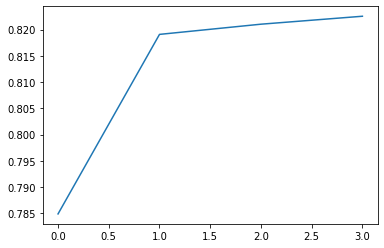

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std

def get_models():
	models = dict()
	n_trees = [10, 50, 100, 500]
	for n in n_trees:
		models[str(n)] = GradientBoostingClassifier(n_estimators=n)
	return models
 
def evaluate_model(model, X, y):
	
	scores = model.score(X, y)
	return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
  model.fit(X_train, Y_train)
  scores = model.score(X_validation, Y_validation)
  results.append(scores)
  names.append(name)
  print('>%s %.3f ' % (name, mean(scores)))


pyplot.plot(results)
pyplot.show()

>0.1 0.818 
>0.2 0.820 
>0.3 0.820 
>0.4 0.821 
>0.5 0.821 
>0.6 0.822 
>0.7 0.822 
>0.8 0.821 
>0.9 0.822 
>1.0 0.821 


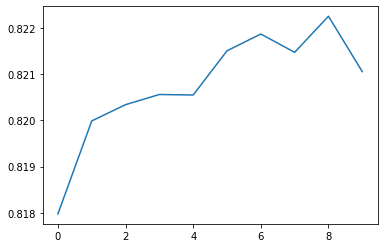

In [ ]:
from numpy import arange
def get_models():
	models = dict()
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		models[key] = GradientBoostingClassifier(subsample=i)
	return models
 
def evaluate_model(model, X, y):
	
	scores = model.score(X, y)
	return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
  model.fit(X_train, Y_train)
  scores = model.score(X_validation, Y_validation)
  results.append(scores)
  names.append(name)
  print('>%s %.3f ' % (name, mean(scores)))


pyplot.plot(results)
pyplot.show()


>1 0.788 
>2 0.802 
>3 0.806 
>4 0.811 
>5 0.815 
>6 0.816 
>7 0.817 
>8 0.819 
>9 0.816 
>10 0.819 
>11 0.820 
>12 0.818 
>13 0.819 
>14 0.820 
>15 0.819 
>16 0.819 
>17 0.820 
>18 0.820 
>19 0.820 
>20 0.820 


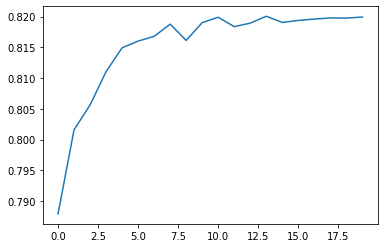

In [ ]:
def get_models():
  models = dict()
  for i in range(1,21):
    models[str(i)] = GradientBoostingClassifier(max_features=i)
  return models
 
def evaluate_model(model, X, y):
	
	scores = model.score(X, y)
	return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
  model.fit(X_train, Y_train)
  scores = model.score(X_validation, Y_validation)
  results.append(scores)
  names.append(name)
  print('>%s %.3f ' % (name, mean(scores)))


pyplot.plot(results)
pyplot.show()
  


>0.0001 0.784 
>0.0010 0.784 
>0.0100 0.784 
>0.1000 0.821 
>1.0000 0.806 


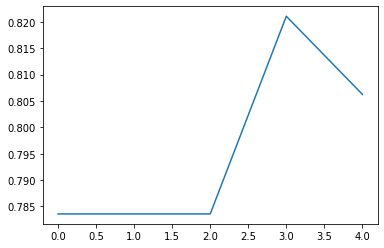

In [ ]:
def get_models():
  models = dict()
  for i in [0.0001, 0.001, 0.01, 0.1, 1.0]:
    key = '{%.4f}' % i
    models[key] = GradientBoostingClassifier(learning_rate=i)
  return models
 
def evaluate_model(model, X, y):
	
	scores = model.score(X, y)
	return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
  model.fit(X_train, Y_train)
  scores = model.score(X_validation, Y_validation)
  results.append(scores)
  names.append(name)
  print('>%s %.3f ' % (name, mean(scores)))


pyplot.plot(results)
pyplot.show()